In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import iqr

# Cargar la data
Con pandas carga los datos de el archivo csv *Data_CHF_Zhao_2020_ATE.csv*

In [2]:
data_chf = pd.read_csv("Data_CHF_Zhao_2020_ATE.csv")

In [3]:
data_chf.describe()

,id,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
count,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000
mean,933.000000,10.010949,2862.647721,0.016179,9.417212,16.167721,911.340483,3.854638
std,538.523444,4.282715,1656.412247,0.117575,6.333807,21.182870,726.718974,1.985535
min,1.000000,0.100000,0.000000,-0.866700,1.000000,1.000000,10.000000,0.800000
25%,467.000000,6.890000,1519.000000,-0.048300,5.600000,5.600000,432.000000,2.400000
50%,933.000000,10.340000,2590.000000,0.024400,8.500000,10.300000,625.000000,3.500000
75%,1399.000000,13.790000,3933.000000,0.100600,11.100000,15.200000,1778.000000,4.800000
max,1865.000000,20.680000,7975.000000,0.232000,37.500000,120.000000,3048.000000,19.300000


Creamos una lista con las variables numericas

In [4]:
numerical_cols = [
    'pressure [MPa]', 'mass_flux [kg/m2-s]', 'x_e_out [-]',
    'D_e [mm]', 'D_h [mm]', 'length [mm]', 'chf_exp [MW/m2]'
]

# Analizando los datos númericos

Para realizar un análisis de incertidumbre en los datos, es fundamental calcular y entender diversas medidas de dispersión y error. A continuación, se describen las medidas de dispersión y error utilizadas para evaluar la variabilidad y la precisión de los datos.


## Medidas de Disperción
### Media: 
Representa el valor promedio de los datos y se calcula sumando todos los valores y dividiéndolos por el número total de observaciones. La media es útil para obtener una visión general de la magnitud típica de los valores en un conjunto de datos.

### Desviación Estándar
Mide la variabilidad o dispersión de los datos alrededor de la media. Es crucial para evaluar la variabilidad de los datos.

### SEM (Error Estándar de la Media)
El Error Estándar de la Media (SEM) es una medida que describe cuán precisamente la media de una muestra representa la media de la población general. 
El SEM se calcula dividiendo la desviación estándar de la muestra por la raíz cuadrada del número de observaciones en la muestra.
$$
SEM = \frac{\sigma}{\sqrt{n}}
$$

### SEM % of Mean (Error Estándar de la Media como Porcentaje de la Media)
El SEM % of Mean también expresa el SEM como un porcentaje de la media.Este valor proporciona una medida de cuán significativa es la incertidumbre alrededor de la media en términos relativos al tamaño de la media misma. Es útil para comparar la precisión de las medias entre diferentes conjuntos de datos donde las escalas de medición pueden diferir.

$$
\text{SEM \% of Mean} = \frac{SEM}{\mu} \times 100
$$


###  Rango Intercuartílico (IQR) 
El IQR es una medida de dispersión estadística que se utiliza para describir la variabilidad de los datos al concentrarse en la parte central de una distribución. El IQR es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1) de los datos. Estos cuartiles dividen el conjunto de datos en cuatro partes iguales.
$$
\text{IQR} = Q3 - Q1
$$


Calcular para la lista de variables numericas:
- Media
- desviación estándar
- SEM (Error Estándar de la Media)
- Error Estándar de la Media como Porcentaje de la Media
- IQR


Debemos almacenar los resultados en un data frame de pandas, el data fame lo debemos crear a partir de un diccionario.

El resultado debe ser el siguiente

| Variable     | Mean       | Standard Deviation | SEM       | SEM % of Mean | IQR    |
|--------------|------------|---------------------|-----------|---------------|--------|
| pressure [MPa]| 10.010949  | 4.282715            | 0.099170  | 0.990614      | 6.9000 |
| mass_flux [kg/m²-s] | 2862.647721 | 1656.412247  | 38.355621 | 1.339865      | 2414.0000 |
| x_e_out [-]  | 0.016179   | 0.117575            | 0.002723  | 16.827823     | 0.1489 |
| D_e [mm]     | 9.417212   | 6.333807            | 0.146665  | 1.557410      | 5.5000 |
| D_h [mm]     | 16.167721  | 21.182870           | 0.490507  | 3.033867      | 9.6000 |
| length [mm]  | 911.340483 | 726.718974          | 16.827790 | 1.846488      | 1346.0000 |
| chf_exp [MW/m²] | 3.854638  | 1.985535           | 0.045977  | 1.192764      | 2.4000 |



In [18]:
# Desviación estándar de las columnas numéricas
std_devs = data_chf[numerical_cols].std()

# Medias de las columnas numéricas
means = data_chf[numerical_cols].mean()

# Cantidad de muestras para cada variable
n_samples = data_chf[numerical_cols].count()

# Error estándar medio (SEM)
sems = std_devs / n_samples**0.5

# Porcentaje del error estándar respecto a la media
sem_percentage = (sems / means) * 100

# IQR
# utilizar la funcion iqr de scipy.stats
iqr_data = data_chf[numerical_cols].apply(iqr)

# Crear un DataFrame para mostrar los resultados
uncertainty_df = pd.DataFrame({
    'Mean': means,
    'Standard Deviation': std_devs,
    'SEM': sems,
    'SEM % of Mean': sem_percentage,
    'IQR': iqr_data
})
uncertainty_df

,Mean,Standard Deviation,SEM,SEM % of Mean,IQR
pressure [MPa],10.010949,4.282715,0.099170,0.990614,6.9000
mass_flux [kg/m2-s],2862.647721,1656.412247,38.355621,1.339865,2414.0000
x_e_out [-],0.016179,0.117575,0.002723,16.827823,0.1489
D_e [mm],9.417212,6.333807,0.146665,1.557410,5.5000
D_h [mm],16.167721,21.182870,0.490507,3.033867,9.6000
length [mm],911.340483,726.718974,16.827790,1.846488,1346.0000
chf_exp [MW/m2],3.854638,1.985535,0.045977,1.192764,2.4000


# **Interpretación de Resultados de las medidas de dispersión**

## **Pressure [MPa]**
- **Media:** 10.01 MPa, lo que indica que la presión promedio los datos analizados es considerablemente moderada..
- **Desviación Estándar:** 4.28 MPa, mostrando una variabilidad considerable en los valores de presión.
- **SEM (%):** 0.99%, esto sugiere una alta rigurosidad en el valor de la media.
- **IQR:** 6.9 MPa, lo que indica que el 50% central de los datos de esta sección están dentro de el rango establecido.

## **Mass Flux [kg/m²-s]**
- **Media:** 2862.65 kg/m²-s, lo que nos indica un flujo elevado.
- **Desviación Estándar:** 1656.41 kg/m²-s, representando una alta dispersión de los valores obtenidos.
- **SEM (%):** 1.33%, sugiere que la media tiene una buena precisión estadística.
- **IQR:** 2414 kg/m²-s, indica una dispersión intercuartil significativa por lo tanto, hay una variabilidad en las condiciones experimentales.

## **x_e_out [-]**
- **Media:** 0.016, representa valor muy cercanos a cero en la moyor parte de los datos analizados.
- **Desviación Estándar:** 0.117, representa una variabilidad relativa en la fracción de vaporización.
- **SEM (%):** 16.82%, lo que implica que la precisión en la media es pequeña, causa de la dispersión de los valores.
- **IQR:** 0.1489, lo que indica que los valores centrales están cerca de cero, pero hay presencia de valores negativos y positivos.

## **D_e [mm]**
- **Media:** 9.41 mm, lo que indica un diámetro promedio moderado en los datos.
- **Desviación Estándar:** 6.33 mm, representa una variabilidad en los diámetros utilizados.
- **SEM (%):** 1.55%, mostrando que la media es una buena estimación del diámetro promedio.
- **IQR:** 5.5 mm, lo que sugiere una variación moderada en la distribución de los valores.

## **D_h [mm]**
- **Media:** 16.16 mm, representa en promedio que los valores de $D_h>D_e$.
- **Desviación Estándar:** 21.18 mm, lo que sugiere una variabilidad importante en las dimensiones analizadas.
- **SEM (%):** 3.03%, sugiere una precisión aceptable en la estimación de la media.
- **IQR:** 9.6 mm, mostrando que la mayoría de los datos se encuentran en este rango intercuartil.

## **Length [mm]**
- **Media:** 911.34 mm, lo que representa una longitud promedio de casi un metro en los experimentos.
- **Desviación Estándar:** 726.71 mm, lo que indica una gran variabilidad en las longitudes analizadas.
- **SEM (%):** 1.84%, mostrando que la media es una estimación bastante confiable de la longitud promedio.
- **IQR:** 1346 mm, indicando una gran dispersión en la distribución de valores de longitud.

## **chf_exp [MW/m²]**
- **Media:** 3.85 MW/m², lo que indica que el flujo de calor crítico promedio es relativamente alto.
- **Desviación Estándar:** 1.98 MW/m², lo que sugiere una variabilidad considerable en los valores experimentales.
- **SEM (%):** 1.19%, indicando una buena precisión en la estimación de la media.
- **IQR:** 2.4 MW/m², lo que sugiere que la mayoría de los valores están concentrados en un rango relativamente estrecho.

**En general se pueden notar los siguientes aspectos**
- Variables como **mass flux, length y D_h** presentan una alta dispersión en los datos, puede representar distintos tipos de datos experimentales.
- La variable **x_e_out** tiene una alta variabilidad relativa (SEM % alto), lo que implica que hay incertidumbre considerable en la estimación de su media.
- **Pressure y chf_exp** tienen valores de SEM % bajos, lo que nos indica que sus medias son buenas estimaciones de los valores reales.
- El **IQR** muestra que la mayoría de los datos se agrupan dentro de un rango definido, pero hay algunas variables con una dispersión amplia, indicando una posible inestabilidad en las condiciones en las que se obtuvieron los datos.

## Graficando la data

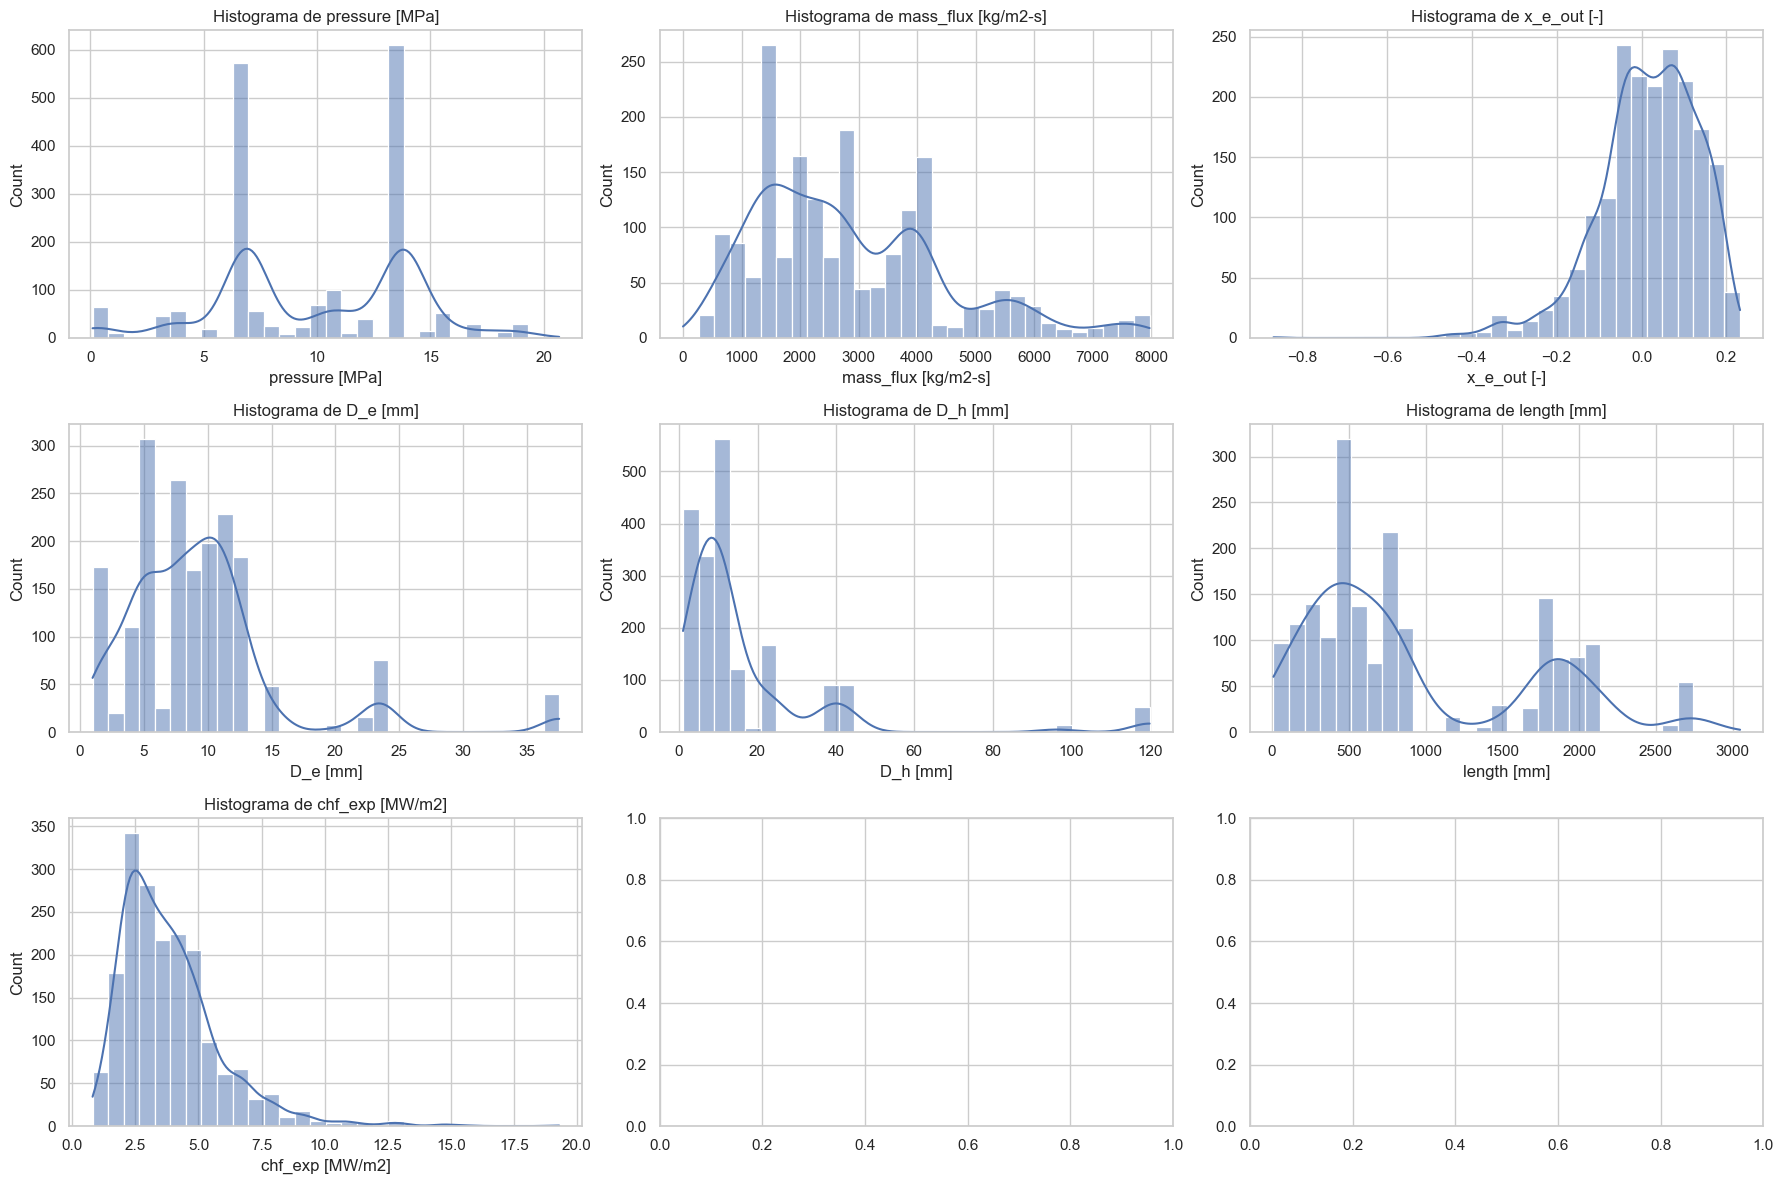

In [16]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()


# Plotting histograms for each numerical column
for i, col in enumerate(numerical_cols):
    if i < len(axes):  #no más de un gráfico en cada cuadro
        sns.histplot(data_chf[col], bins=30, kde=True, ax=axes[i])
        axes[i].set_title(f"Histograma de {col}")


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()